In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('data\challenge_edMachina.csv', sep=';') 

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196124 entries, 0 to 196123
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   particion           196124 non-null  int64  
 1   periodo             196124 non-null  object 
 2   nota_final_materia  196124 non-null  float64
 3   fecha_mesa_epoch    7010 non-null    float64
 4   nombre_examen       7010 non-null    object 
 5   nota_parcial        7010 non-null    float64
 6   assignment_id       26061 non-null   float64
 7   ass_name            26061 non-null   object 
 8   ass_created_at      26061 non-null   float64
 9   ass_due_at          26061 non-null   float64
 10  ass_unlock_at       24760 non-null   float64
 11  ass_lock_at         25979 non-null   float64
 12  points_possible     26061 non-null   float64
 13  ass_name_sub        24206 non-null   object 
 14  sub_uuid            24206 non-null   object 
 15  score               23876 non-null

In [8]:
df.isnull().sum()

particion                  0
periodo                    0
nota_final_materia         0
fecha_mesa_epoch      189114
nombre_examen         189114
nota_parcial          189114
assignment_id         170063
ass_name              170063
ass_created_at        170063
ass_due_at            170063
ass_unlock_at         171364
ass_lock_at           170145
points_possible       170063
ass_name_sub          171918
sub_uuid              171918
score                 172248
submission_type       171918
s_submitted_at        171918
s_graded_at           172247
s_created_at          171918
user_uuid                  0
course_uuid                0
course_name                0
legajo                     0
dtype: int64

In [5]:
# Calcular estadísticas descriptivas
estadisticas_descriptivas = df[['nota_final_materia', 'nota_parcial', 'score']].describe()

# Calcular mediana
medianas = df[['nota_final_materia', 'nota_parcial', 'score']].median()

# Agregar la mediana a las estadísticas descriptivas
estadisticas_descriptivas.loc['median'] = medianas

print(estadisticas_descriptivas)

        nota_final_materia  nota_parcial         score
count        196124.000000   7010.000000  23876.000000
mean              7.546700      7.171469     84.159968
std               1.732275      1.823261     18.254782
min               0.000000      0.000000      0.000000
25%               7.000000      6.000000     75.000000
50%               8.000000      7.000000     88.333333
75%               9.000000      9.000000    100.000000
max              10.000000     10.000000    100.000000
median            8.000000      7.000000     88.333333


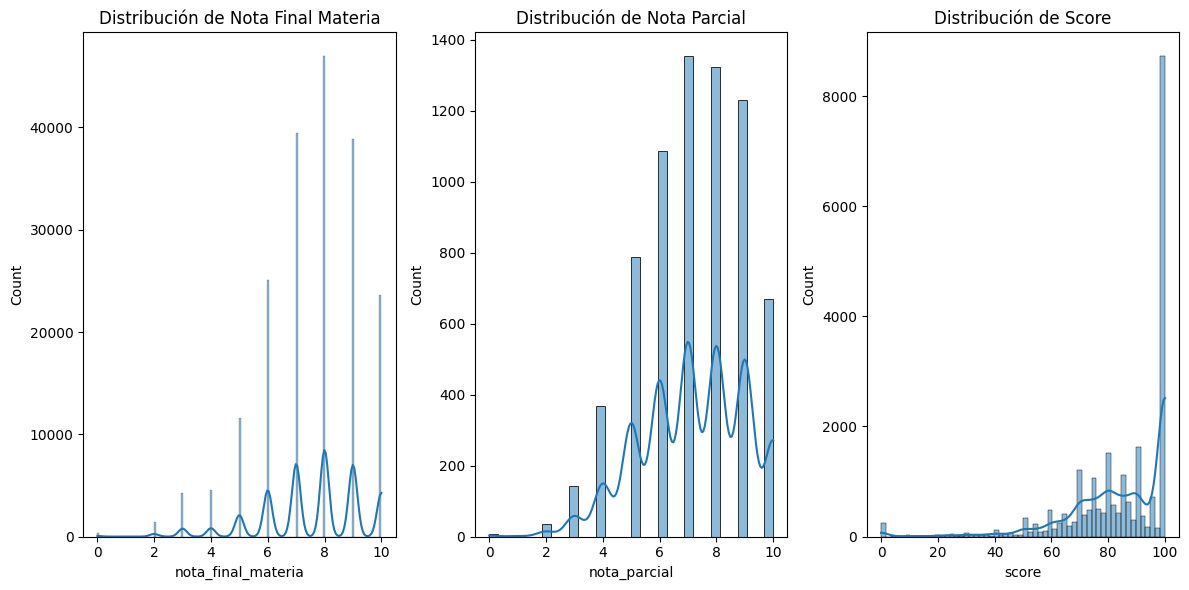

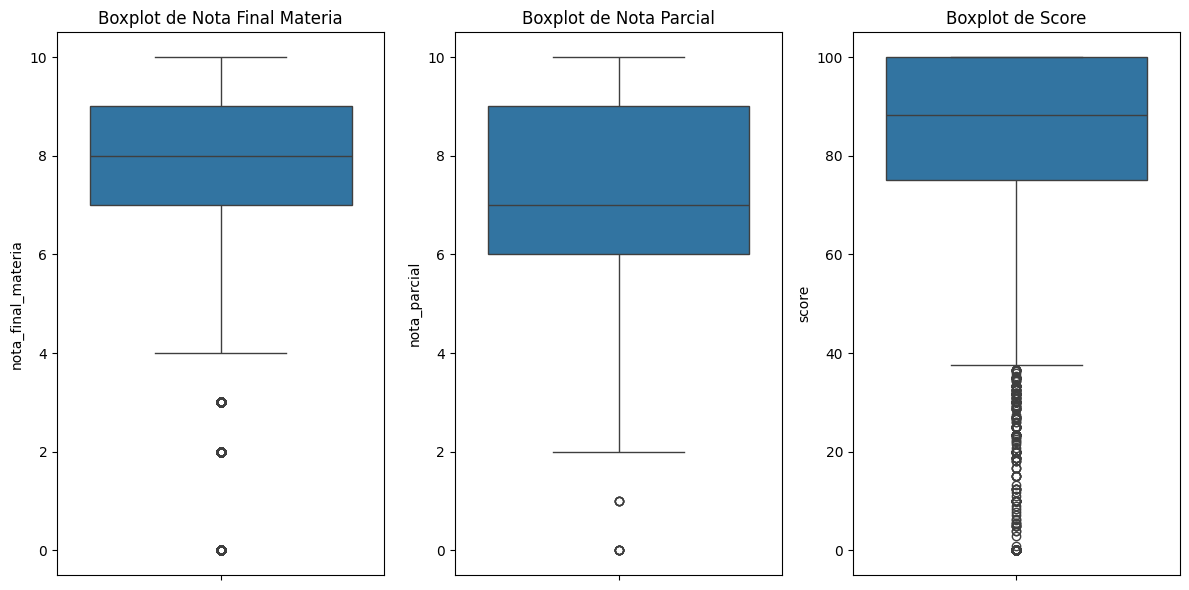

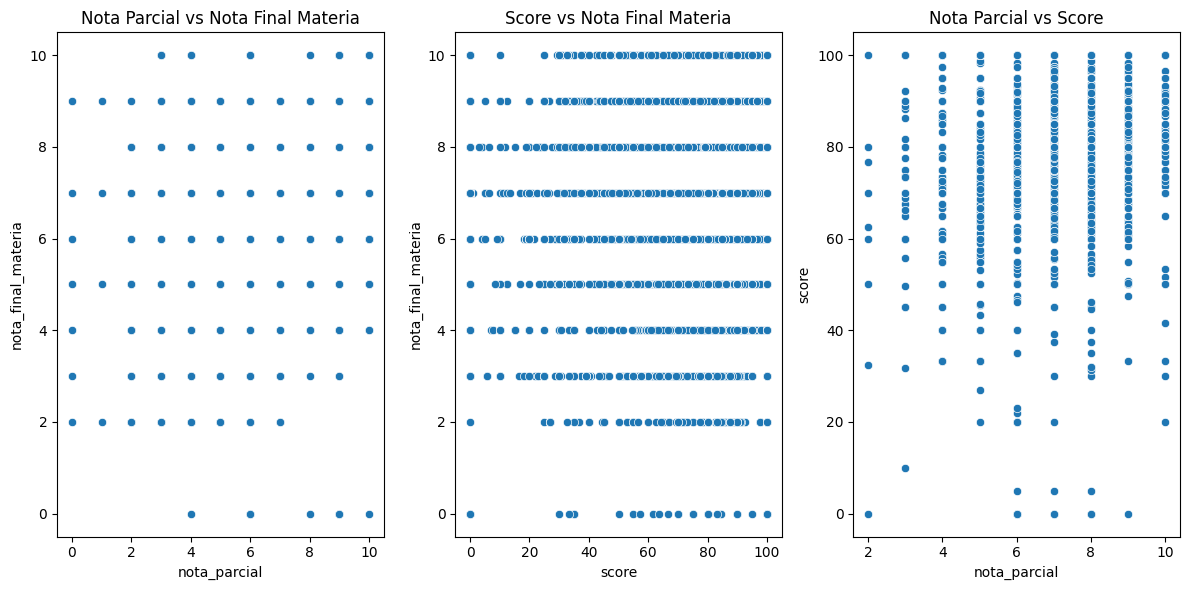

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['nota_final_materia'], kde=True)
plt.title('Distribución de Nota Final Materia')

plt.subplot(1, 3, 2)
sns.histplot(df['nota_parcial'], kde=True)
plt.title('Distribución de Nota Parcial')

plt.subplot(1, 3, 3)
sns.histplot(df['score'], kde=True)
plt.title('Distribución de Score')

plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['nota_final_materia'])
plt.title('Boxplot de Nota Final Materia')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['nota_parcial'])
plt.title('Boxplot de Nota Parcial')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['score'])
plt.title('Boxplot de Score')

plt.tight_layout()
plt.show()

# Gráficos de dispersión (Scatter plots)
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=df['nota_parcial'], y=df['nota_final_materia'])
plt.title('Nota Parcial vs Nota Final Materia')

plt.subplot(1, 3, 2)
sns.scatterplot(x=df['score'], y=df['nota_final_materia'])
plt.title('Score vs Nota Final Materia')

plt.subplot(1, 3, 3)
sns.scatterplot(x=df['nota_parcial'], y=df['score'])
plt.title('Nota Parcial vs Score')

plt.tight_layout()
plt.show()


Los gráficos de dispersión revelan tendencias claras en las relaciones entre las principales variables. El gráfico de "Nota Parcial vs Nota Final de Materia" muestra que, en general, a medida que aumentan las notas parciales, también lo hacen las notas finales. De manera similar, el gráfico "Score vs Nota Final de Materia" indica que scores más altos están asociados con notas finales más altas. En el gráfico "Nota Parcial vs Score" se observa que notas parciales más altas tienden a coincidir con scores más altos.

In [11]:
# Cargar el DataFrame
df = pd.read_csv('data/challenge_edMachina.csv', sep=';') 

# Convertir 'score' a una escala de 0 a 10
df['score'] = (df['score'] / 100 * 10).round(1)

# Crear un nuevo DataFrame sin los valores nulos de las columnas score
df_sin_nulos = df.dropna(subset=['score']).copy()  # Usar .copy() para evitar advertencias

# Calcular la nota parcial estimada
df_sin_nulos.loc[:, 'nota_parcial_estimada'] = (df_sin_nulos['nota_final_materia'] * 2 - df_sin_nulos['score']) / 2

# Rellenar los valores nulos de 'nota_parcial' con los estimados
df_sin_nulos.loc[df_sin_nulos['nota_parcial'].isna(), 'nota_parcial'] = df_sin_nulos['nota_parcial_estimada']

In [8]:
df_sin_nulos.isnull().sum()

particion                    0
periodo                      0
nota_final_materia           0
fecha_mesa_epoch         21592
nombre_examen            21592
nota_parcial                 0
assignment_id            16777
ass_name                 16777
ass_created_at           16777
ass_due_at               16777
ass_unlock_at            17328
ass_lock_at              16809
points_possible          16777
ass_name_sub                 0
sub_uuid                     0
score                        0
submission_type              0
s_submitted_at               0
s_graded_at                  0
s_created_at                 0
user_uuid                    0
course_uuid                  0
course_name                  0
legajo                       0
nota_parcial_estimada        0
dtype: int64

In [15]:
# Definir las columnas de tipo str a procesar
columnas_str = ['ass_name', 'nombre_examen']

# Reemplazar valores faltantes en columnas de tipo str con la moda
for col in columnas_str:
    moda = df_sin_nulos[col].mode()[0]  # Calcular la moda 
    df_sin_nulos[col].fillna(moda, inplace=True)  # Reemplazar nulos por la moda

In [16]:
df_sin_nulos.isnull().sum()

particion                    0
periodo                      0
nota_final_materia           0
fecha_mesa_epoch             0
nombre_examen                0
nota_parcial                 0
assignment_id            16777
ass_name                     0
ass_created_at           16777
ass_due_at               16777
ass_unlock_at            17328
ass_lock_at              16809
points_possible          16777
ass_name_sub                 0
sub_uuid                     0
score                        0
submission_type              0
s_submitted_at               0
s_graded_at                  0
s_created_at                 0
user_uuid                    0
course_uuid                  0
course_name                  0
legajo                       0
nota_parcial_estimada        0
dtype: int64

In [4]:
df_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23876 entries, 15 to 196092
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   particion              23876 non-null  int64  
 1   periodo                23876 non-null  object 
 2   nota_final_materia     23876 non-null  float64
 3   fecha_mesa_epoch       2284 non-null   float64
 4   nombre_examen          2284 non-null   object 
 5   nota_parcial           23876 non-null  float64
 6   assignment_id          7099 non-null   float64
 7   ass_name               7099 non-null   object 
 8   ass_created_at         7099 non-null   float64
 9   ass_due_at             7099 non-null   float64
 10  ass_unlock_at          6548 non-null   float64
 11  ass_lock_at            7067 non-null   float64
 12  points_possible        7099 non-null   float64
 13  ass_name_sub           23876 non-null  object 
 14  sub_uuid               23876 non-null  object 
 15  score

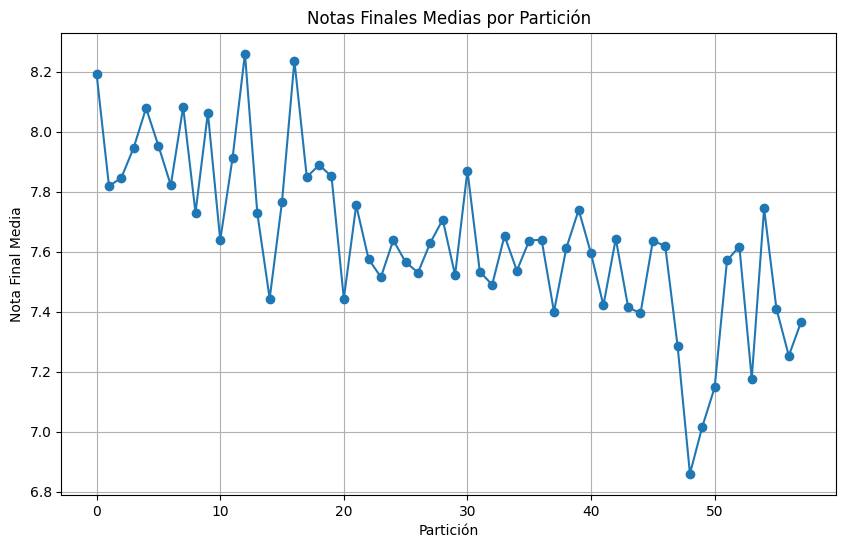

In [41]:
# Agrupar por partición y calcular la media de las notas finales
partition_group = df_sin_nulos.groupby('particion')['nota_final_materia'].mean().reset_index()

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(partition_group['particion'], partition_group['nota_final_materia'], marker='o')
plt.xlabel('Partición')
plt.ylabel('Nota Final Media')
plt.title('Notas Finales Medias por Partición')
plt.grid(True)
plt.show()

El gráfico revela que las notas finales se mantienen bastante estables hasta la partición 46, donde se produce una caída abrupta, seguida de un aumento en la partición 51. Es necesario investigar qué fechas o periodos corresponden a estas particiones y analizar posibles eventos o cambios que pudieran haber influido en el rendimiento de los estudiantes durante ese tiempo.

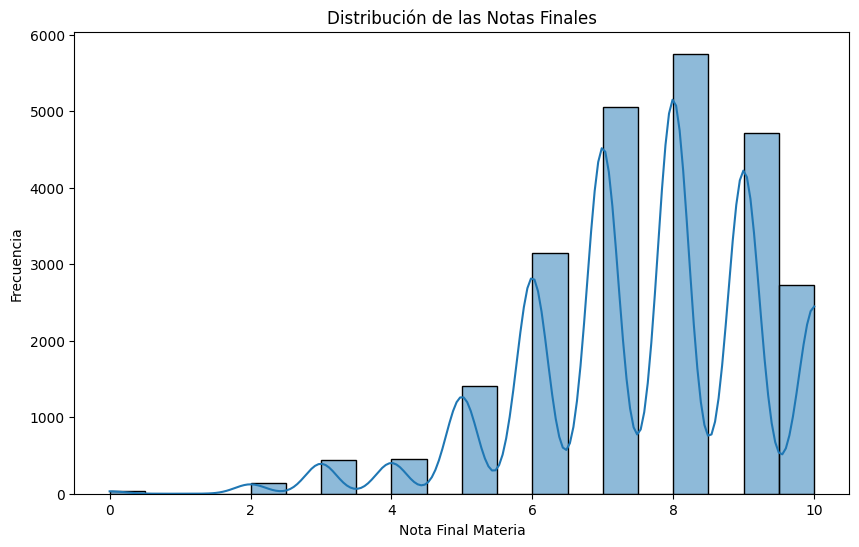

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(df_sin_nulos['nota_final_materia'], bins=20, kde=True)
plt.title('Distribución de las Notas Finales')
plt.xlabel('Nota Final Materia')
plt.ylabel('Frecuencia')
plt.show()

Las notas más frecuentes se encuentran entre 6 y 10, lo que sugiere que una mayoría de los estudiantes logra un rendimiento aceptable a excelente.

Correlación entre Nota Parcial y Nota Final Materia: 0.7030


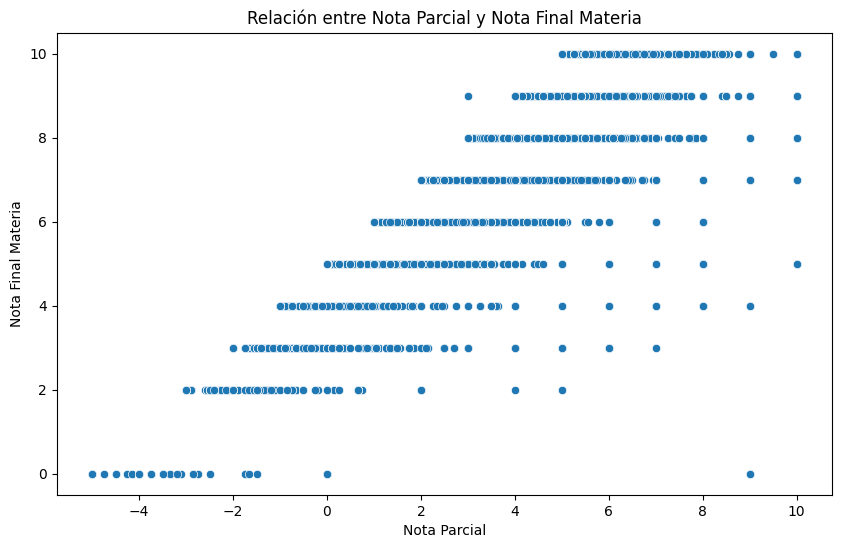

In [43]:
# Calcular la correlación
correlation = df_sin_nulos['nota_parcial'].corr(df_sin_nulos['nota_final_materia'])
print(f"Correlación entre Nota Parcial y Nota Final Materia: {correlation:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='nota_parcial', y='nota_final_materia', data=df_sin_nulos)
plt.title('Relación entre Nota Parcial y Nota Final Materia')
plt.xlabel('Nota Parcial')
plt.ylabel('Nota Final Materia')
plt.show()

Correlación entre Score y Nota Final Materia: 0.1809


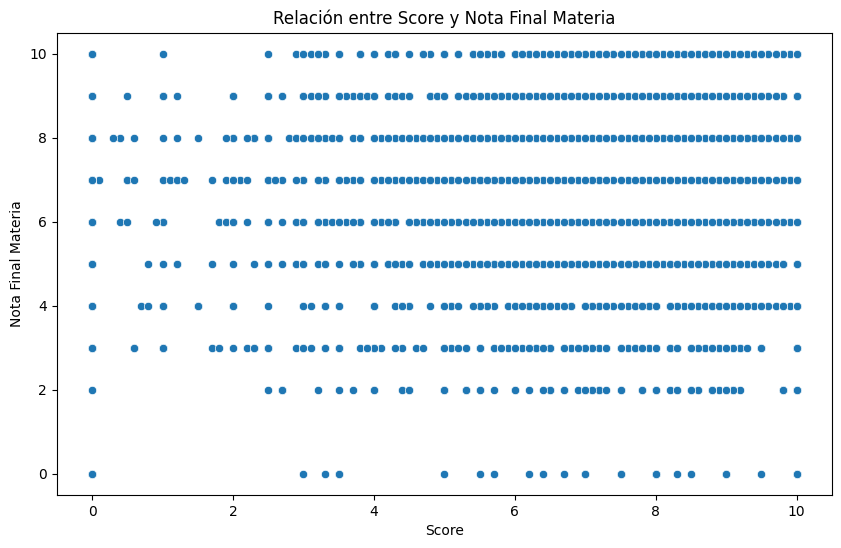

In [44]:
# Calcular la correlación
correlation_score = df_sin_nulos['score'].corr(df_sin_nulos['nota_final_materia'])
print(f"Correlación entre Score y Nota Final Materia: {correlation_score:.4f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='nota_final_materia', data=df_sin_nulos)
plt.title('Relación entre Score y Nota Final Materia')
plt.xlabel('Score')
plt.ylabel('Nota Final Materia')
plt.show()

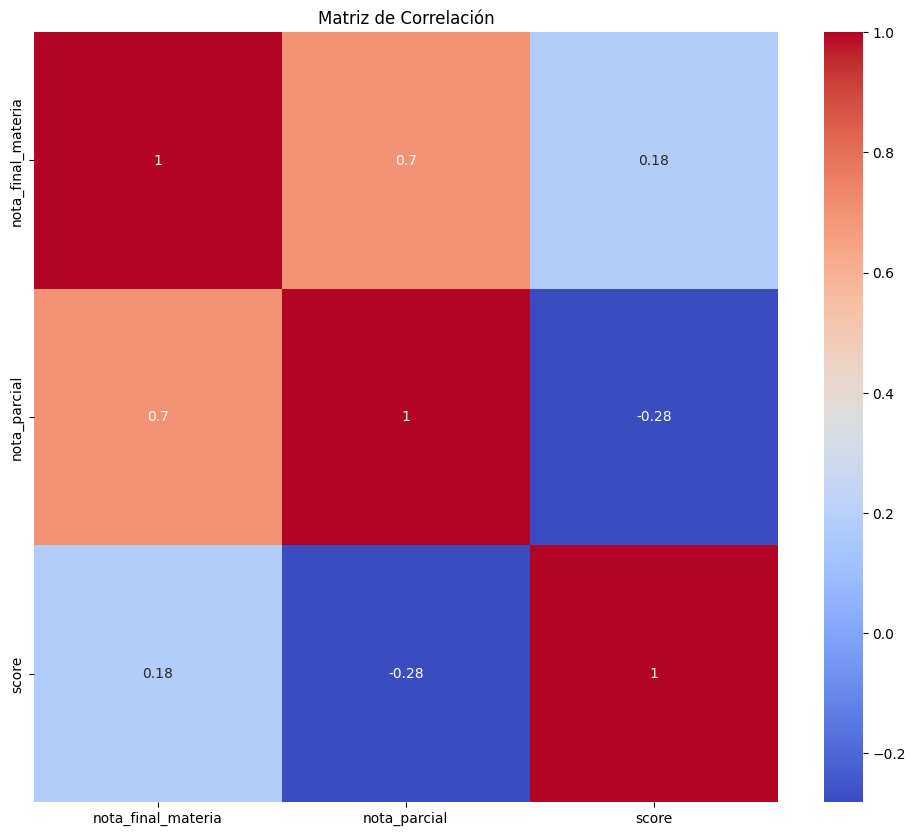

In [45]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_sin_nulos[['nota_final_materia', 'nota_parcial', 'score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [46]:
df_sin_nulos['promedio_score_nota_parcial'] = df_sin_nulos[['score', 'nota_parcial']].mean(axis=1)
correlacion = df_sin_nulos['promedio_score_nota_parcial'].corr(df_sin_nulos['nota_final_materia'])


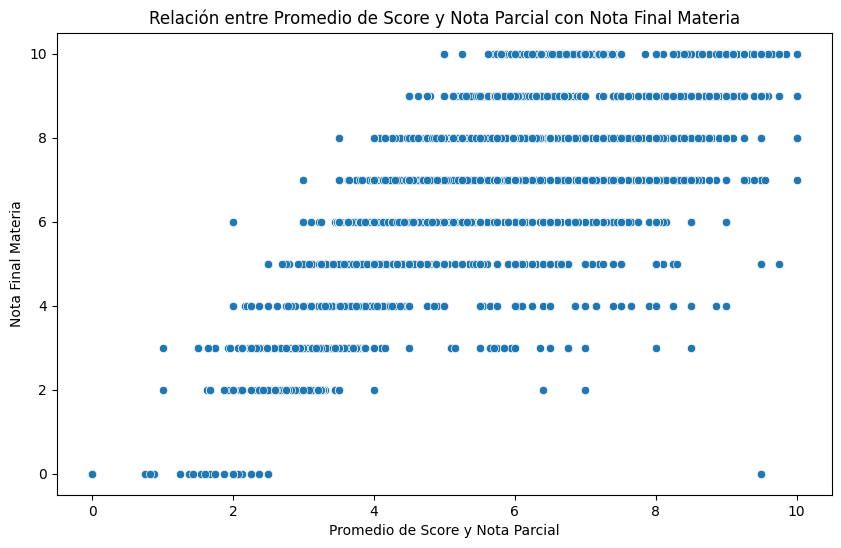

Correlación entre el promedio de score y nota_parcial con nota_final_materia: 0.7627305129098438


In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='promedio_score_nota_parcial', y='nota_final_materia', data=df_sin_nulos)
plt.title('Relación entre Promedio de Score y Nota Parcial con Nota Final Materia')
plt.xlabel('Promedio de Score y Nota Parcial')
plt.ylabel('Nota Final Materia')
plt.show()
print(f'Correlación entre el promedio de score y nota_parcial con nota_final_materia: {correlacion}')


La correlación entre el promedio de las notas parciales y los puntajes de las tareas (score) con la nota final de la materia es de aproximadamente 0.76. 

Esto indica una correlación positiva fuerte, lo que sugiere que los estudiantes que tienen mejores promedios en sus notas parciales y puntajes de tareas 
tienden a obtener mejores notas finales en la materia.

Este hallazgo es consistente con la expectativa de que un buen rendimiento durante el curso (se refleja tanto en las notas parciales como en los puntajes de las tareas) está asociado con un buen rendimiento en el examen final.

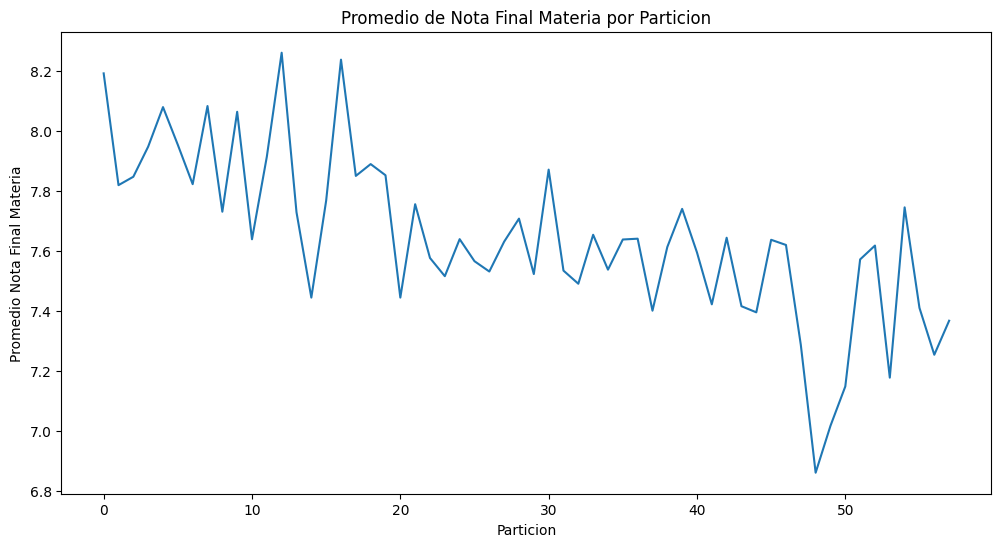

In [48]:
# Calcular el promedio de nota_final_materia por particion
promedio_nota_final_por_particion = df_sin_nulos.groupby('particion')['nota_final_materia'].mean().reset_index()

# Graficar el promedio de nota_final_materia por particion
plt.figure(figsize=(12, 6))
sns.lineplot(data=promedio_nota_final_por_particion, x='particion', y='nota_final_materia')
plt.title('Promedio de Nota Final Materia por Particion')
plt.xlabel('Particion')
plt.ylabel('Promedio Nota Final Materia')
plt.show()


El análisis de tendencias temporales basado en la variable 'particion' revela información valiosa sobre cómo varían las notas finales a lo largo del tiempo. 
El gráfico de lineas del promedio de 'nota_final_materia' por 'particion' muestra cómo fluctúan las notas finales en diferentes periodos. Se observa que, en general, 
los promedios de notas finales tienden a bajar a medida que avanza el ciclo académico, con una caída notable hacia el final de las clases. En particular, la partición 48 
indica una gran disminución en el promedio de las notas finales, lo que podría sugerir dificultades adicionales que enfrentan los estudiantes en esta fase del curso.

In [17]:
# Lista de columnas que deben ser convertidas a datetime
fecha_columnas = [
    'fecha_mesa_epoch', 'ass_created_at', 'ass_due_at', 
    'ass_unlock_at', 'ass_lock_at', 's_submitted_at', 
    's_graded_at', 's_created_at'
]
# Convertir las columnas de fecha a datetime
for col in fecha_columnas:
    df_sin_nulos[col] = pd.to_datetime(df_sin_nulos[col], unit='s')

In [18]:
df_sin_nulos.head(5)

,particion,periodo,nota_final_materia,fecha_mesa_epoch,nombre_examen,nota_parcial,assignment_id,ass_name,ass_created_at,ass_due_at,...,score,submission_type,s_submitted_at,s_graded_at,s_created_at,user_uuid,course_uuid,course_name,legajo,nota_parcial_estimada
15,15,1-2022,9.0,2022-05-30,SEGUNDO PARCIAL(20),4.0,NaN,Trabajo Práctico 2 [TP2],NaT,NaT,...,10.0,external_tool,2022-04-03 03:19:59,2022-04-03 03:29:45,2022-08-01 22:27:07,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,4.0
21,21,1-2022,9.0,2022-05-30,SEGUNDO PARCIAL(20),5.5,195293.0,Trabajo Práctico 1 [TP1],2022-02-24 18:46:00,2022-04-19 02:59:59,...,7.0,online_upload,2022-04-18 19:56:31,2022-04-25 00:55:57,2022-08-01 22:27:07,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,5.5
22,21,1-2022,9.0,2022-05-30,SEGUNDO PARCIAL(20),4.0,195293.0,Trabajo Práctico 1 [TP1],2022-02-24 18:46:00,2022-04-19 02:59:59,...,10.0,external_tool,2022-04-18 01:09:33,2022-04-18 01:12:23,2022-08-01 22:27:07,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,4.0
33,32,1-2022,9.0,2022-05-30,SEGUNDO PARCIAL(20),4.0,195294.0,Trabajo Práctico 2 [TP2],2022-02-24 18:46:00,2022-05-17 02:59:59,...,10.0,external_tool,2022-05-15 21:22:53,2022-05-15 21:23:46,2022-08-01 22:27:07,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,4.0
34,32,1-2022,9.0,2022-05-30,SEGUNDO PARCIAL(20),6.5,195294.0,Trabajo Práctico 2 [TP2],2022-02-24 18:46:00,2022-05-17 02:59:59,...,5.0,online_upload,2022-05-15 21:19:04,2022-05-22 16:10:59,2022-08-01 22:27:07,13df535e-065c-4593-98ea-5b1e29015b7d,09614210-fce2-48bc-93e3-bc4bd441fe00,Progressive homogeneous structure,834066QFF,6.5


In [19]:
# Agrupar por user_uuid, course_uuid y particion, y calcular estadísticas relevantes
grouped_df = df_sin_nulos.groupby(['user_uuid', 'course_uuid', 'particion']).agg({
    'nota_final_materia': ['mean', 'median', 'var'],
    'nota_parcial': ['mean', 'median', 'var'],
    'score': ['mean', 'median', 'var'],
    'ass_name': 'count',
    'nombre_examen': 'count',
    's_created_at': 'first',  # Tomamos el primer valor de s_created_at para cada grupo
    's_submitted_at': 'first' # Tomamos el primer valor de s_submitted_at para cada grupo
}).reset_index()

# Renombrar columnas para facilitar su uso
grouped_df.columns = [
    'user_uuid', 'course_uuid', 'particion', 
    'nota_final_media', 'nota_final_mediana', 'nota_final_varianza',
    'nota_parcial_media', 'nota_parcial_mediana', 'nota_parcial_varianza',
    'score_media', 'score_mediana', 'score_varianza',
    'frecuencia_tareas', 'frecuencia_examenes',
    's_created_at', 's_submitted_at'
]

# Mantener la columna original de nota_final_materia
grouped_df['nota_final_materia'] = df_sin_nulos.groupby(['user_uuid', 'course_uuid', 'particion'])['nota_final_materia'].first().values

La frecuencia de tareas y exámenes proviene de contar la cantidad de ocurrencias de ass_name (nombre de la tarea) y nombre_examen (nombre del examen) respectivamente dentro de cada grupo. Esto nos da una idea de cuántas tareas y exámenes fueron realizados en cada partición temporal para cada combinación de user_uuid y course_uuid.

In [20]:
grouped_df.head(5)

,user_uuid,course_uuid,particion,nota_final_media,nota_final_mediana,nota_final_varianza,nota_parcial_media,nota_parcial_mediana,nota_parcial_varianza,score_media,score_mediana,score_varianza,frecuencia_tareas,frecuencia_examenes,s_created_at,s_submitted_at,nota_final_materia
0,01103370-3046-4bc0-a8f8-85858ec0ec88,2dd2ca01-a672-4eca-aca7-6fbc8cd01953,26,7.0,7.0,NaN,2.0000,2.0,NaN,10.000,10.0,NaN,1,1,2022-08-01 22:27:07,2022-04-09 11:28:38,7.0
1,01103370-3046-4bc0-a8f8-85858ec0ec88,2dd2ca01-a672-4eca-aca7-6fbc8cd01953,31,7.0,7.0,NaN,2.0000,2.0,NaN,10.000,10.0,NaN,1,1,2022-08-01 22:27:07,2022-04-16 20:00:20,7.0
2,01103370-3046-4bc0-a8f8-85858ec0ec88,2dd2ca01-a672-4eca-aca7-6fbc8cd01953,36,7.0,7.0,NaN,2.0000,2.0,NaN,10.000,10.0,NaN,1,1,2022-08-01 22:27:07,2022-04-25 17:33:35,7.0
3,01103370-3046-4bc0-a8f8-85858ec0ec88,2dd2ca01-a672-4eca-aca7-6fbc8cd01953,49,7.0,7.0,0.0,2.6375,2.7,0.252292,8.725,8.6,1.009167,4,4,2022-08-01 22:27:07,2022-05-16 15:38:49,7.0
4,01103370-3046-4bc0-a8f8-85858ec0ec88,a8c25bca-c5e5-4225-b51e-f61468d20386,28,9.0,9.0,NaN,4.0000,4.0,NaN,10.000,10.0,NaN,1,1,2022-08-01 22:27:07,2022-06-02 23:37:37,9.0


In [21]:
# Convertir s_created_at y s_submitted_at a datetime
grouped_df['s_created_at'] = pd.to_datetime(grouped_df['s_created_at'])
grouped_df['s_submitted_at'] = pd.to_datetime(grouped_df['s_submitted_at'])

# Calcular el tiempo entre la creación y la entrega de tareas en horas
grouped_df['tiempo_entrega'] = (grouped_df['s_created_at'] - grouped_df['s_submitted_at']).dt.days


In [17]:
grouped_df.isnull().sum()

user_uuid                   0
course_uuid                 0
particion                   0
nota_final_media            0
nota_final_mediana          0
nota_final_varianza      8653
nota_parcial_media          0
nota_parcial_mediana        0
nota_parcial_varianza    8653
score_media                 0
score_mediana               0
score_varianza           8653
frecuencia_tareas           0
frecuencia_examenes         0
s_created_at                0
s_submitted_at              0
nota_final_materia          0
tiempo_entrega              0
dtype: int64

In [22]:
# Calcular la media de las varianzas
media_nota_final_varianza = grouped_df['nota_final_varianza'].mean()
media_nota_parcial_varianza = grouped_df['nota_parcial_varianza'].mean()
media_score_varianza = grouped_df['score_varianza'].mean()

# Rellenar los valores nulos con la media en cada columna
grouped_df['nota_final_varianza'].fillna(media_nota_final_varianza, inplace=True)
grouped_df['nota_parcial_varianza'].fillna(media_nota_parcial_varianza, inplace=True)
grouped_df['score_varianza'].fillna(media_score_varianza, inplace=True)

In [23]:
grouped_df.isnull().sum()

user_uuid                0
course_uuid              0
particion                0
nota_final_media         0
nota_final_mediana       0
nota_final_varianza      0
nota_parcial_media       0
nota_parcial_mediana     0
nota_parcial_varianza    0
score_media              0
score_mediana            0
score_varianza           0
frecuencia_tareas        0
frecuencia_examenes      0
s_created_at             0
s_submitted_at           0
nota_final_materia       0
tiempo_entrega           0
dtype: int64

In [24]:
# Guardar el DataFrame como un archivo CSV
grouped_df.to_csv('data/challenge_para_modelo.csv', sep=';', index=False)

Modelado

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
grouped_df = pd.read_csv('data\challenge_para_modelo.csv', sep=';') 

In [4]:
# Preparar el dataset para el modelado
# Incluimos las nuevas características y eliminamos las columnas no relevantes
X = grouped_df.drop(columns=[
    'user_uuid', 'course_uuid', 'particion', 
    's_created_at', 's_submitted_at', 'nota_final_media', 
    'nota_final_mediana', 'nota_final_varianza', 'nota_final_materia'  # Estas columnas no deben estar en X
])

# La variable objetivo es 'nota_final_materia'
y = grouped_df['nota_final_materia']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Vamos a comparar varios modelos: Regresión Lineal, Árboles de Decisión, Random Forest y Gradient Boosting.

Regresión Lineal: Elegimos la regresión lineal como un modelo de referencia debido a su simplicidad y capacidad para captar relaciones lineales entre las variables independientes y la variable dependiente.

Árboles de Decisión: Probamos los árboles de decisión porque son modelos no paramétricos que pueden manejar relaciones no lineales y capturar interacciones entre variables de manera intuitiva y visualmente interpretable.

Random Forest: Optamos por Random Forest para aprovechar su capacidad de reducir el sobreajuste al promediar múltiples árboles de decisión, mejorando así la precisión y robustez del modelo.

Gradient Boosting: Incluimos Gradient Boosting para evaluar su capacidad de construir modelos más precisos mediante la combinación de predictores débiles en una secuencia de árboles, optimizando el rendimiento a través del aprendizaje iterativo.

In [6]:
# Definir los modelos
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Entrenar y evaluar los modelos
results = {}
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_scaled, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test_scaled)
    
    # Calcular las métricas
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Guardar los resultados
    results[model_name] = {
        "Mean Squared Error": mse,
        "R^2 Score": r2
    }
    

# Comparar los resultados
results_df = pd.DataFrame(results).T
print(results_df)


                   Mean Squared Error  R^2 Score
Decision Tree                0.256932   0.910904
Linear Regression            0.860930   0.701457
Random Forest                0.182994   0.936543
Gradient Boosting            0.218115   0.924365


In [7]:
# Evaluar los modelos utilizando validación cruzada
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()
    
    print(f"Model: {model_name}")
    print(f"Cross-Validated R^2 Score: {mean_cv_score:.4f} ± {std_cv_score:.4f}")
    print("-" * 30)

Model: Decision Tree
Cross-Validated R^2 Score: 0.8884 ± 0.0156
------------------------------
Model: Linear Regression
Cross-Validated R^2 Score: 0.6625 ± 0.0203
------------------------------
Model: Random Forest
Cross-Validated R^2 Score: 0.9049 ± 0.0186
------------------------------
Model: Gradient Boosting
Cross-Validated R^2 Score: 0.8958 ± 0.0124
------------------------------


In [8]:
# Definición del grid de hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas para ser un nodo hoja
}

# Búsqueda de hiperparámetros
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Mejor estimador
best_rf = grid_search_rf.best_estimator_

# Predicción y evaluación
y_pred_best_rf = best_rf.predict(X_test_scaled)
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_best_rf):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_best_rf):.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error: 0.1385
R^2 Score: 0.9520


Evaluación Final en el Conjunto de Prueba

In [9]:

y_pred_test = best_rf.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Mean Squared Error: {mse_test:.4f}")
print(f"Test R^2 Score: {r2_test:.4f}")

Test Mean Squared Error: 0.1385
Test R^2 Score: 0.9520


In [10]:
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-Validated R^2 Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Cross-Validated R^2 Score: 0.9284 ± 0.0066


Presentación de Métricas

In [11]:
print("Modelo: Random Forest")
print(f"Mejores Parámetros: {grid_search_rf.best_params_}")
print(f"Mean Squared Error (Entrenamiento): {mean_squared_error(y_train, best_rf.predict(X_train_scaled)):.4f}")
print(f"Mean Squared Error (Prueba): {mse_test:.4f}")
print(f"R^2 Score (Entrenamiento): {r2_score(y_train, best_rf.predict(X_train_scaled)):.4f}")
print(f"R^2 Score (Prueba): {r2_test:.4f}")
print(f"Cross-Validated R^2 Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


Modelo: Random Forest
Mejores Parámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean Squared Error (Entrenamiento): 0.1268
Mean Squared Error (Prueba): 0.1385
R^2 Score (Entrenamiento): 0.9532
R^2 Score (Prueba): 0.9520
Cross-Validated R^2 Score: 0.9284 ± 0.0066


Código del Modelo Final

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Preparación del dataset
X = grouped_df.drop(columns=[
    'user_uuid', 'course_uuid', 'particion', 
    's_created_at', 's_submitted_at', 'nota_final_media', 
    'nota_final_mediana', 'nota_final_varianza', 'nota_final_materia'
])
y = grouped_df['nota_final_materia']

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarización
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definición del grid de hiperparámetros para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de cada árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]  # Número mínimo de muestras requeridas para ser un nodo hoja
}

# Búsqueda de hiperparámetros
grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_scaled, y_train)

# Mejor estimador
best_rf = grid_search_rf.best_estimator_

# Predicción y evaluación
y_pred_best_rf = best_rf.predict(X_test_scaled)

# Calcular métricas de rendimiento
mse_test = mean_squared_error(y_test, y_pred_best_rf)
mae_test = mean_absolute_error(y_test, y_pred_best_rf)
r2_test = r2_score(y_test, y_pred_best_rf)

# Imprimir resultados
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Mean Squared Error (Test): {mse_test:.4f}")
print(f"Mean Absolute Error (Test): {mae_test:.4f}")
print(f"R^2 Score (Test): {r2_test:.4f}")

# Validación cruzada
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-Validated R^2 Score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Mean Squared Error (Test): 0.1377
Mean Absolute Error (Test): 0.1145
R^2 Score (Test): 0.9522
Cross-Validated R^2 Score: 0.9286 ± 0.0067


Descripción del Código

Preparación de Datos: Se eliminan columnas irrelevantes y se define la variable objetivo.

División de Datos: Se divide el dataset en conjuntos de entrenamiento y prueba.

Estandarización: Se escalan las características para mejorar el rendimiento del modelo.

Búsqueda de Hiperparámetros: Se configura y ejecuta GridSearchCV para encontrar los mejores parámetros para el random forest.

Predicción y Evaluación: Se realizan predicciones en el conjunto de prueba y se calculan métricas de rendimiento.

Validación Cruzada: Se evalúa el modelo con validación cruzada.

In [ ]:
'''from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Supongamos que ya tienes X_train y y_train definidos
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Obtener la importancia de las características
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print(feature_importance_df)'''
